In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import requests
from sklearn.cluster import KMeans
from scipy.spatial import distance
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

In [ ]:
keras.__version__

'2.5.0'

## Ambil Data

In [ ]:
url = 'https://drive.google.com/file/d/1rgVIVZfaFvsSrCOVmrHY83vvYg9LkgUN/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
Data = pd.read_csv(path)

In [ ]:
Data

,Unnamed: 0,Date,Time,Device,Kwh
0,0,2021-02-16,21:12:43,5,0.0
1,1,2021-02-16,21:13:08,5,0.0
2,2,2021-02-16,21:13:33,5,0.0
3,3,2021-02-16,21:13:57,5,0.0
4,4,2021-02-16,21:14:22,5,0.0
...,...,...,...,...,...
28775,28775,2021-07-08,14:42:26,5,401.0
28776,28776,2021-07-08,14:47:27,5,401.0
28777,28777,2021-07-08,14:52:28,5,401.0
28778,28778,2021-07-08,14:57:28,5,401.0


In [ ]:
Data_pakai = Data
DateTime = Data_pakai['Date'] + ' ' + Data_pakai['Time']
Data_pakai['DateTime'] = DateTime
Data_pakai = Data_pakai.drop(columns="Date")
Data_pakai = Data_pakai.drop(columns="Time")
Data_pakai = Data_pakai.drop(columns="Device")
Data_pakai = Data_pakai.drop(columns="Unnamed: 0")

In [ ]:
Data_pakai

,Kwh,DateTime
0,0.0,2021-02-16 21:12:43
1,0.0,2021-02-16 21:13:08
2,0.0,2021-02-16 21:13:33
3,0.0,2021-02-16 21:13:57
4,0.0,2021-02-16 21:14:22
...,...,...
28775,401.0,2021-07-08 14:42:26
28776,401.0,2021-07-08 14:47:27
28777,401.0,2021-07-08 14:52:28
28778,401.0,2021-07-08 14:57:28


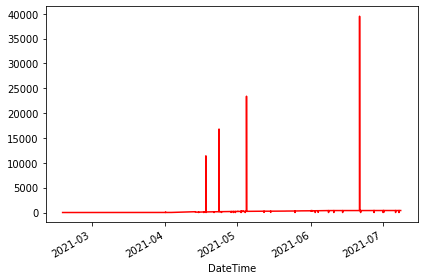

In [ ]:
#Check and Plot Data (Hanya Check Doang gak pakal dipakae di preprocessing)
Data_checkz = Data_pakai
Data_checkz = Data_checkz.set_index(pd.to_datetime(Data_checkz["DateTime"], errors='coerce', format = "%Y-%m-%d %H:%M:%S"))

Data_checkz = Data_checkz.drop(['DateTime'], axis=1)

Data_checkz.Kwh.plot(color = "red") 
plt.tight_layout()
plt.show()

## Pre-Processing

In [ ]:
Data_proses = Data_pakai
Data_dateBenar = pd.to_datetime(Data_proses["DateTime"],format = "%Y-%m-%d %H:%M:%S", errors='coerce')
Data_Benar = pd.concat([Data_dateBenar,Data_proses["Kwh"]], axis=1)

In [ ]:
Data_Benar

,DateTime,Kwh
0,2021-02-16 21:12:43,0.0
1,2021-02-16 21:13:08,0.0
2,2021-02-16 21:13:33,0.0
3,2021-02-16 21:13:57,0.0
4,2021-02-16 21:14:22,0.0
...,...,...
28775,2021-07-08 14:42:26,401.0
28776,2021-07-08 14:47:27,401.0
28777,2021-07-08 14:52:28,401.0
28778,2021-07-08 14:57:28,401.0


In [ ]:
Data_Benar = Data_Benar.dropna()

In [ ]:
Data_Benar

,DateTime,Kwh
0,2021-02-16 21:12:43,0.0
1,2021-02-16 21:13:08,0.0
2,2021-02-16 21:13:33,0.0
3,2021-02-16 21:13:57,0.0
4,2021-02-16 21:14:22,0.0
...,...,...
28775,2021-07-08 14:42:26,401.0
28776,2021-07-08 14:47:27,401.0
28777,2021-07-08 14:52:28,401.0
28778,2021-07-08 14:57:28,401.0


In [ ]:
Last_Value = Data_Benar["Kwh"].iloc[-1]
final_df = Data_Benar.loc[(Data_Benar["Kwh"] > 0.0)]

In [ ]:
final_df

,DateTime,Kwh
313,2021-03-13 20:49:13,20.0
314,2021-03-13 20:49:37,20.0
315,2021-03-13 20:50:02,20.0
316,2021-03-13 20:50:27,20.0
317,2021-03-13 20:51:35,20.0
...,...,...
28775,2021-07-08 14:42:26,401.0
28776,2021-07-08 14:47:27,401.0
28777,2021-07-08 14:52:28,401.0
28778,2021-07-08 14:57:28,401.0


In [ ]:
format = '%Y-%m-%d %H:%M:%S'
final_df['Datetime'] = pd.to_datetime(final_df['DateTime'], format=format)
final_df = final_df.set_index(pd.DatetimeIndex(final_df['Datetime']))
final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DateTime,Kwh,Datetime
Datetime,,,
2021-03-13 20:49:13,2021-03-13 20:49:13,20.0,2021-03-13 20:49:13
2021-03-13 20:49:37,2021-03-13 20:49:37,20.0,2021-03-13 20:49:37
2021-03-13 20:50:02,2021-03-13 20:50:02,20.0,2021-03-13 20:50:02
2021-03-13 20:50:27,2021-03-13 20:50:27,20.0,2021-03-13 20:50:27
2021-03-13 20:51:35,2021-03-13 20:51:35,20.0,2021-03-13 20:51:35
...,...,...,...
2021-07-08 14:42:26,2021-07-08 14:42:26,401.0,2021-07-08 14:42:26
2021-07-08 14:47:27,2021-07-08 14:47:27,401.0,2021-07-08 14:47:27
2021-07-08 14:52:28,2021-07-08 14:52:28,401.0,2021-07-08 14:52:28


In [ ]:
final_df.drop(['DateTime'], axis=1, inplace=True)
final_df.drop(['Datetime'], axis=1, inplace=True)
final_df

,Kwh
Datetime,
2021-03-13 20:49:13,20.0
2021-03-13 20:49:37,20.0
2021-03-13 20:50:02,20.0
2021-03-13 20:50:27,20.0
2021-03-13 20:51:35,20.0
...,...
2021-07-08 14:42:26,401.0
2021-07-08 14:47:27,401.0
2021-07-08 14:52:28,401.0


In [ ]:
df_hour = final_df.resample('30min').max() 
df_hour = df_hour.resample('h').min() 

In [ ]:
df_hour = df_hour.dropna()
df_hour

,Kwh
Datetime,
2021-03-13 20:00:00,20.0
2021-03-13 21:00:00,20.0
2021-03-13 22:00:00,20.0
2021-03-13 23:00:00,20.0
2021-03-14 00:00:00,20.0
...,...
2021-07-08 11:00:00,401.0
2021-07-08 12:00:00,401.0
2021-07-08 13:00:00,401.0


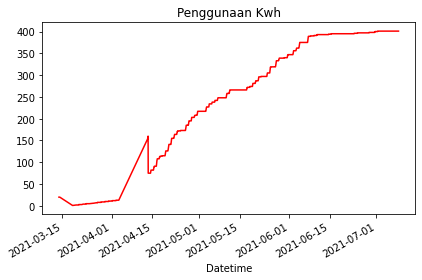

In [ ]:
df_hour.Kwh.plot(title='Penggunaan Kwh', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
df_interpolate_lin = df_hour.interpolate(method='linear',axis=0)
df_interpolate_lin

,Kwh
Datetime,
2021-03-13 20:00:00,20.0
2021-03-13 21:00:00,20.0
2021-03-13 22:00:00,20.0
2021-03-13 23:00:00,20.0
2021-03-14 00:00:00,20.0
...,...
2021-07-08 11:00:00,401.0
2021-07-08 12:00:00,401.0
2021-07-08 13:00:00,401.0


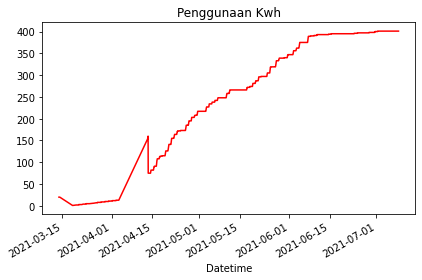

In [ ]:
df_interpolate_lin.Kwh.plot(title='Penggunaan Kwh', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
df_pakai = df_interpolate_lin
df_pakai = df_pakai.iloc[int(np.ceil(len(df_pakai.values)*.30)):]
df_pakai

,Kwh
Datetime,
2021-04-29 05:00:00,203.0
2021-04-29 06:00:00,203.0
2021-04-29 07:00:00,203.0
2021-04-29 08:00:00,203.0
2021-04-29 09:00:00,204.0
...,...
2021-07-08 11:00:00,401.0
2021-07-08 12:00:00,401.0
2021-07-08 13:00:00,401.0


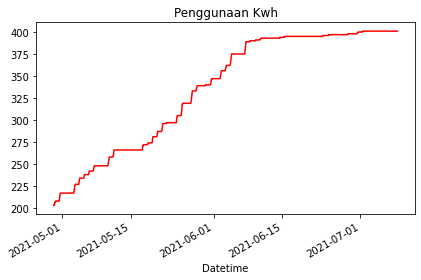

In [ ]:
df_pakai.Kwh.plot(title='Penggunaan Kwh', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
df_stationary=df_pakai.diff().dropna()

In [ ]:
df_stationary

,Kwh
Datetime,
2021-04-29 06:00:00,0.0
2021-04-29 07:00:00,0.0
2021-04-29 08:00:00,0.0
2021-04-29 09:00:00,1.0
2021-04-29 10:00:00,1.0
...,...
2021-07-08 11:00:00,0.0
2021-07-08 12:00:00,0.0
2021-07-08 13:00:00,0.0


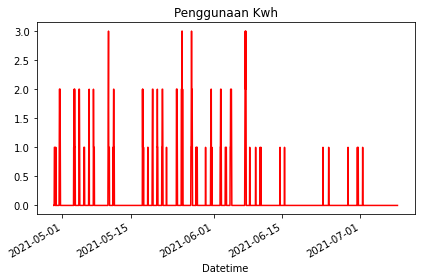

In [ ]:
df_stationary.Kwh.plot(title='Penggunaan Kwh', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
df_stationary.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1665 entries, 2021-04-29 06:00:00 to 2021-07-08 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Kwh     1665 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB


In [ ]:
df_model = df_stationary
df_model = df_model.reset_index()
df_model

,Datetime,Kwh
0,2021-04-29 06:00:00,0.0
1,2021-04-29 07:00:00,0.0
2,2021-04-29 08:00:00,0.0
3,2021-04-29 09:00:00,1.0
4,2021-04-29 10:00:00,1.0
...,...,...
1660,2021-07-08 11:00:00,0.0
1661,2021-07-08 12:00:00,0.0
1662,2021-07-08 13:00:00,0.0
1663,2021-07-08 14:00:00,0.0


In [ ]:
df_model_nor = df_pakai
df_model_nor = df_model_nor.reset_index()
df_model_nor

,Datetime,Kwh
0,2021-04-29 05:00:00,203.0
1,2021-04-29 06:00:00,203.0
2,2021-04-29 07:00:00,203.0
3,2021-04-29 08:00:00,203.0
4,2021-04-29 09:00:00,204.0
...,...,...
1661,2021-07-08 11:00:00,401.0
1662,2021-07-08 12:00:00,401.0
1663,2021-07-08 13:00:00,401.0
1664,2021-07-08 14:00:00,401.0


## RBF Implementation

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
def RBFunction(r, x,c ):
    return( np.exp(- (distance.euclidean(x, c))**2/r**2))

In [ ]:
# Computing radial/spread
def radial (x,c ):
    r=[]
    for i in range (c.shape[0]):
        k=[]
        for j in range(x.shape[0]) :
            k.append(distance.euclidean(x.iloc[j,:], c[i])) 
        m=(sum(k)/len(k))
        r.append(m)
    return(r)

In [ ]:
def centers (data,n):
    kmeans = KMeans(n_clusters=n)
    a = kmeans.fit(data)
    return(kmeans.cluster_centers_)     

In [ ]:
def RBF (centers,radials, X): 
    s=[[]for k in range (centers.shape[0])]
    
    for i in range (centers.shape[0]):
        for j in range (X.shape[0]):
            X=pd.DataFrame(X)
            s[i] .append(RBFunction(radials[i] ,X.iloc[j,:],centers[i]))
    s=pd.DataFrame(s)
    return(s.transpose())

In [ ]:
# function to evaluate the performance of the models
def evaluate(y,pred):
    #MAPE:Mean absolute percentage error
    def MAPE(y,pred):
        mapev=[]
        aux1=y.reset_index(drop=True)
        aux1=pd.Series(aux1)
        aux2=pd.Series(pred)

        for i in aux1.index:
            if aux1[i]==0:
                mapev.append(0)
            else:
                mapev.append(abs(aux1[i]-aux2[i])/aux1[i])

        mape=(np.mean(mapev))*100
        return(mape)

#MAD:Mean absolute deviation
    def MAD_MSD(y,pred):
        madv=[]
        mapev=[]
        aux1=y.reset_index(drop=True)
        aux1=pd.Series(aux1)
        aux2=pd.Series(pred)
        for i in aux1.index:
            if aux1[i]==0:
                mapev.append(0)
            else:
                mapev.append(abs(aux1[i]-aux2[i])/aux1[i])
        for i in aux1.index:
            if aux1[i]!=0:
               madv.append(mapev[i]*aux1[i])
            else:
               madv.append(0)
        mad=np.mean(madv)
        #MSD:Mean squared deviation
        msdv=np.square(madv)
        msd=np.mean(msdv)
        return(mad,msd)

#SMAPE:Symmetric mean absolute percentage error
    def SMAPE(y,pred):
       smapev=[]
       smape=0
       aux1=y.reset_index(drop=True)
       aux1=pd.Series(aux1)
       aux2=pd.Series(pred)
       for i in aux1.index:
           if aux1[i]==0:
              smapev.append(0)
           else:
               smapev.append(2*(abs(aux1[i]-aux2[i])/((abs(aux1[i])+abs(aux2[i])))))

       smape = (np.mean(smapev))*100
       return(smape)
    MAPE=MAPE(y,pred)
    MAD,MSD=MAD_MSD(y,pred)
    SMAPE=SMAPE(y,pred)
    nn=['MAPE','MAD','MSD','SMAPE']
    kk=[MAPE,MAD,MSD,SMAPE]
    eva=pd.DataFrame([nn,kk])
    return(kk)

## PreProcess RBF

In [ ]:
#First transformation
df_FirstTrans = df_stationary
dat=df_FirstTrans.pivot_table(index='Datetime',values='Kwh',aggfunc='sum')
dat

,Kwh
Datetime,
2021-04-29 06:00:00,0.0
2021-04-29 07:00:00,0.0
2021-04-29 08:00:00,0.0
2021-04-29 09:00:00,1.0
2021-04-29 10:00:00,1.0
...,...
2021-07-08 11:00:00,0.0
2021-07-08 12:00:00,0.0
2021-07-08 13:00:00,0.0


In [ ]:
data = df_stationary
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .70))

training_data_len

1166

In [ ]:
data_nor = df_pakai
# Convert the dataframe to a numpy array
dataset_nor = data_nor.values
# Get the number of rows to train the model on
training_data_len_nor = int(np.ceil( len(dataset_nor) * .70))

training_data_len_nor

1167

In [ ]:
Products=dat.columns
Products

Index(['Kwh'], dtype='object')

In [ ]:
dat_array=np.array(dat)
dat_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
dt_supervised=series_to_supervised(dat_array,10,1)
dt_supervised

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
11,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
training_data_len = int(np.ceil(len(dt_supervised) * .70))
training_data_len

1159

In [ ]:
X_train = dt_supervised.loc[:training_data_len,'var1(t-10)':'var1(t-1)']
X_test = dt_supervised.loc[training_data_len:,'var1(t-10)':'var1(t-1)']
y_train = dt_supervised.loc[:training_data_len,'var1(t)']
y_test = dt_supervised.loc[training_data_len:,'var1(t)']

In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [ ]:
y_train.columns=Products
y_test.columns=Products

In [ ]:
X_train

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
12,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
1159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

,Kwh
10,1.0
11,0.0
12,0.0
13,0.0
14,0.0
...,...
1155,0.0
1156,0.0
1157,0.0
1158,0.0


In [ ]:
y_test

,Kwh
1159,0.0
1160,0.0
1161,0.0
1162,0.0
1163,0.0
...,...
1660,0.0
1661,0.0
1662,0.0
1663,0.0


## Model

In [ ]:
#neural network initialization
# Hyperparameter: number of centers/units of the hidden layer nc

nc=80

#Train
c=centers(X_train , nc)
r=radial(X_train,c)
inputs_train= pd.DataFrame(RBF(c,r,X_train))

#Test
inputs_t= pd.DataFrame(RBF(c,r,X_test))

In [ ]:
#def baseline_model():
    # create model
model = Sequential()
model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
    # Compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
#data preparation
inputs_train_arr=np.array(inputs_train)
inputs_t_arr=np.array(inputs_t)
y_train_arr=np.array(y_train.iloc[:,0])
y_t_arr=np.array(y_test.iloc[:,0])

In [ ]:
#train the model
rbfmodel = model.fit(inputs_train_arr,y_train_arr, epochs=350, batch_size=5, verbose=1)

Epoch 1/350
230/230 [==============================] - 1s 843us/step - loss: 0.2063
Epoch 2/350
230/230 [==============================] - 0s 873us/step - loss: 0.1240
Epoch 3/350
230/230 [==============================] - 0s 941us/step - loss: 0.1313
Epoch 4/350
230/230 [==============================] - 0s 793us/step - loss: 0.1239
Epoch 5/350
230/230 [==============================] - 0s 792us/step - loss: 0.0909
Epoch 6/350
230/230 [==============================] - 0s 778us/step - loss: 0.1104
Epoch 7/350
230/230 [==============================] - 0s 813us/step - loss: 0.1154
Epoch 8/350
230/230 [==============================] - 0s 800us/step - loss: 0.1057
Epoch 9/350
230/230 [==============================] - 0s 772us/step - loss: 0.1028
Epoch 10/350
230/230 [==============================] - 0s 819us/step - loss: 0.1014
Epoch 11/350
230/230 [==============================] - 0s 851us/step - loss: 0.1231
Epoch 12/350
230/230 [==============================] - 0s 765us/step - lo

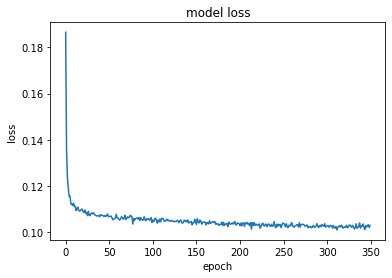

In [ ]:
# summarize history for loss
plt.plot(rbfmodel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Prediction

In [ ]:
#Test
outt=model.predict(inputs_t_arr)
outt

array([[ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0.07265824],
       [ 0

In [ ]:
out2 = pd.DataFrame(outt, columns=["Kwh"]).iloc[::-1]
out2

,Kwh
505,0.072658
504,0.072658
503,0.072658
502,0.072658
501,0.072658
...,...
4,0.072658
3,0.072658
2,0.072658
1,0.072658


In [ ]:
var=explained_variance_score(y_test.iloc[:,0], out2.values) 
mae=mean_absolute_error(y_test.iloc[:,0], out2.values)
mse=mean_squared_error(y_test.iloc[:,0], out2.values)
rmse=np.sqrt(mse)
nn=['Explained variance','MAE','MSE','RMSE']
metric=[var,mae,mse,rmse]
performance=pd.DataFrame([nn,metric])
performance

,0,1,2,3
0,Explained variance,MAE,MSE,RMSE
1,-0.442426,0.090004,0.0222157,0.149049


In [ ]:
Date_test = df_model["Datetime"]
Date_test = np.array(Date_test[-len(y_test.iloc[:,0]):])

In [ ]:
keluar = out2.values
keluar = keluar.flatten()
d = {'predict': keluar, 'validasi': y_test.iloc[:,0]}
visualdata = pd.DataFrame(data=d)
visualdata =visualdata.sort_index()
visualdata["Datetime"] = Date_test
visualdata2 = visualdata.set_index("Datetime")
visualdata2

,predict,validasi
Datetime,,
2021-06-16 13:00:00,0.072658,0.0
2021-06-16 14:00:00,0.072658,0.0
2021-06-16 15:00:00,0.072658,0.0
2021-06-16 16:00:00,0.072658,0.0
2021-06-16 17:00:00,0.072658,0.0
...,...,...
2021-07-08 11:00:00,0.072658,0.0
2021-07-08 12:00:00,0.072658,0.0
2021-07-08 13:00:00,0.072658,0.0


In [ ]:
train = data[:training_data_len]
valid = df_stationary[1159:]
valid['Predictions'] = outt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid

,Kwh,Predictions
Datetime,,
2021-06-16 13:00:00,0.0,0.072658
2021-06-16 14:00:00,0.0,0.072658
2021-06-16 15:00:00,0.0,0.072658
2021-06-16 16:00:00,0.0,0.072658
2021-06-16 17:00:00,0.0,0.072658
...,...,...
2021-07-08 11:00:00,0.0,0.072658
2021-07-08 12:00:00,0.0,0.072658
2021-07-08 13:00:00,0.0,0.072658


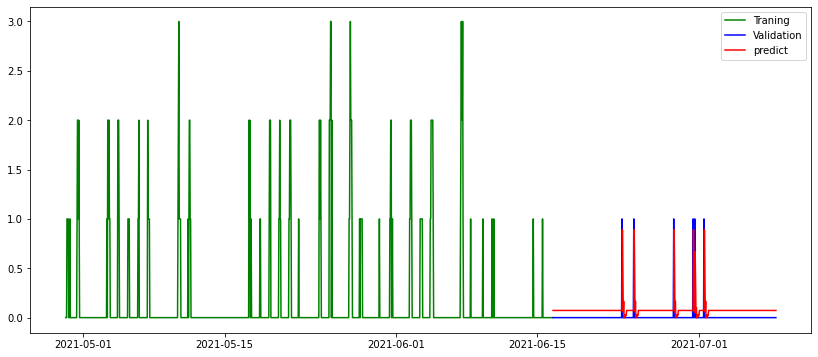

In [ ]:
# Visualize the data
plt.figure(figsize=(14,6))
plt.plot(train['Kwh'], label="Traning",c = "g")
plt.plot(valid['Kwh'], label="Validation",c = "b")
plt.plot(valid['Predictions'], label="predict", c = "r")
plt.legend()
plt.show()

In [ ]:
valid.dropna()
valid

,Kwh,Predictions
Datetime,,
2021-06-16 13:00:00,0.0,0.072658
2021-06-16 14:00:00,0.0,0.072658
2021-06-16 15:00:00,0.0,0.072658
2021-06-16 16:00:00,0.0,0.072658
2021-06-16 17:00:00,0.0,0.072658
...,...,...
2021-07-08 11:00:00,0.0,0.072658
2021-07-08 12:00:00,0.0,0.072658
2021-07-08 13:00:00,0.0,0.072658


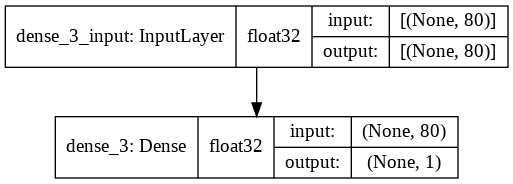

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True)

##All Data 

### All Data + Pre Process (Stationary Output)

In [ ]:
Future_test = df_stationary
Future_test

,Kwh
Datetime,
2021-04-29 06:00:00,0.0
2021-04-29 07:00:00,0.0
2021-04-29 08:00:00,0.0
2021-04-29 09:00:00,1.0
2021-04-29 10:00:00,1.0
...,...
2021-07-08 11:00:00,0.0
2021-07-08 12:00:00,0.0
2021-07-08 13:00:00,0.0


In [ ]:
array_Future = np.array(Future_test)

In [ ]:
#Later User
#data 672/1 bulan jam diambil tiap 10 data
Future_test_series=series_to_supervised(array_Future,10,1)
Future_test_series

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
11,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Future_collumn = Future_test.columns
Future_collumn

Index(['Kwh'], dtype='object')

In [ ]:
#all month prediction Stationary
def tspredictall(Future_test_series,data,nc):
   y=pd.DataFrame( data.loc[:])
   X=data.iloc[:,:(len(Future_test_series)*5)]
   c=centers(X,nc)
   r=radial(X,c)
   inputs= pd.DataFrame(RBF(c,r,X))
   inputs__arr=np.array(inputs)
   y__arr=np.array(y)
   prediction=[]
   
   # create model
   model = Sequential()
   model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
   # Compile model
   opt = tf.keras.optimizers.SGD(learning_rate=0.01)
   model.compile(loss='mean_squared_error', optimizer=opt)

   for i in range(len(Future_test_series)*5):
        model.fit(inputs__arr,y__arr[:,i], epochs=350, batch_size=5,verbose=0)
        pred=model.predict(inputs__arr)
        pred=(np.squeeze(pred))
        prediction.append(pred)
   return (prediction)

predall=tspredictall(Future_collumn,Future_test_series,80)

In [ ]:
predall = np.array(predall)
predall

array([[-5.8040470e-03,  9.5334500e-03, -8.0867246e-02, ...,
        -3.4672171e-03, -3.4672171e-03, -3.4672171e-03],
       [-1.2325257e-02, -3.3134669e-02,  1.1006827e+00, ...,
         4.7986805e-03,  4.7986805e-03,  4.7986805e-03],
       [-2.1801502e-02,  1.0772268e+00,  9.9080145e-01, ...,
         9.1349185e-03,  9.1349185e-03,  9.1349185e-03],
       [ 1.0192316e+00,  9.6350932e-01,  9.5496207e-01, ...,
         5.0316006e-04,  5.0316006e-04,  5.0316006e-04],
       [ 9.8869604e-01,  9.5641559e-01,  9.8922461e-01, ...,
         1.3744086e-03,  1.3744086e-03,  1.3744086e-03]], dtype=float32)

In [ ]:
predall.size

8275

In [ ]:
def predict_dates(num_prediction):
    last_date = df_model['Datetime'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction,freq = "h").tolist()
    return prediction_dates

forecast_dates = predict_dates(predall.size)
forecast_dates

[Timestamp('2021-07-08 15:00:00', freq='H'),
 Timestamp('2021-07-08 16:00:00', freq='H'),
 Timestamp('2021-07-08 17:00:00', freq='H'),
 Timestamp('2021-07-08 18:00:00', freq='H'),
 Timestamp('2021-07-08 19:00:00', freq='H'),
 Timestamp('2021-07-08 20:00:00', freq='H'),
 Timestamp('2021-07-08 21:00:00', freq='H'),
 Timestamp('2021-07-08 22:00:00', freq='H'),
 Timestamp('2021-07-08 23:00:00', freq='H'),
 Timestamp('2021-07-09 00:00:00', freq='H'),
 Timestamp('2021-07-09 01:00:00', freq='H'),
 Timestamp('2021-07-09 02:00:00', freq='H'),
 Timestamp('2021-07-09 03:00:00', freq='H'),
 Timestamp('2021-07-09 04:00:00', freq='H'),
 Timestamp('2021-07-09 05:00:00', freq='H'),
 Timestamp('2021-07-09 06:00:00', freq='H'),
 Timestamp('2021-07-09 07:00:00', freq='H'),
 Timestamp('2021-07-09 08:00:00', freq='H'),
 Timestamp('2021-07-09 09:00:00', freq='H'),
 Timestamp('2021-07-09 10:00:00', freq='H'),
 Timestamp('2021-07-09 11:00:00', freq='H'),
 Timestamp('2021-07-09 12:00:00', freq='H'),
 Timestamp

In [ ]:
Future_data = pd.DataFrame({"Datetime":forecast_dates,"Kwh":predall.reshape(1,-1)[0]})
Future_data

,Datetime,Kwh
0,2021-07-08 15:00:00,-0.005804
1,2021-07-08 16:00:00,0.009533
2,2021-07-08 17:00:00,-0.080867
3,2021-07-08 18:00:00,0.955813
4,2021-07-08 19:00:00,0.957636
...,...,...
8270,2022-06-18 05:00:00,0.001374
8271,2022-06-18 06:00:00,0.001374
8272,2022-06-18 07:00:00,0.001374
8273,2022-06-18 08:00:00,0.001374


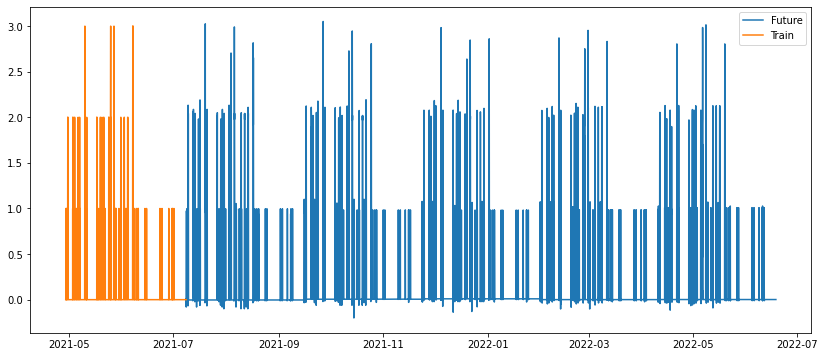

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Future_data["Datetime"],Future_data["Kwh"], label="Future")
plt.plot(df_model["Datetime"],df_model["Kwh"], label = "Train")
plt.legend()
plt.show()

In [ ]:
Data_With_Future = df_model.append(Future_data)
Data_With_Future

,Datetime,Kwh
0,2021-04-29 06:00:00,0.000000
1,2021-04-29 07:00:00,0.000000
2,2021-04-29 08:00:00,0.000000
3,2021-04-29 09:00:00,1.000000
4,2021-04-29 10:00:00,1.000000
...,...,...
8270,2022-06-18 05:00:00,0.001374
8271,2022-06-18 06:00:00,0.001374
8272,2022-06-18 07:00:00,0.001374
8273,2022-06-18 08:00:00,0.001374


In [ ]:
Data_With_Future.set_index("Datetime",inplace=True)

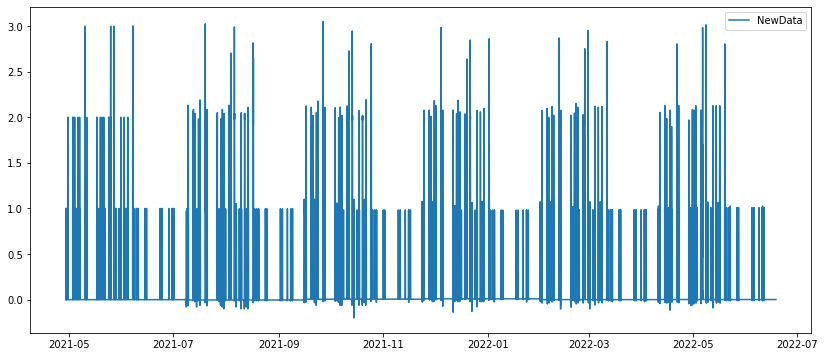

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Data_With_Future, label = "NewData")
plt.legend()
plt.show()

In [ ]:
Data_Bulanan = Data_With_Future.resample('m').sum() 
Data_Bulanan

,Kwh
Datetime,
2021-04-30,14.000000
2021-05-31,130.000000
2021-06-30,53.000000
2021-07-31,93.098299
2021-08-31,94.176333
2021-09-30,69.994082
2021-10-31,129.806133
2021-11-30,49.840183
2021-12-31,137.345255


In [ ]:
 #Pemisalan Harga Rp.2000/Kwh
 hrg = Data_Bulanan.iloc[:] * 15000

In [ ]:
hrg

,Kwh
Datetime,
2021-04-30,2.100000e+05
2021-05-31,1.950000e+06
2021-06-30,7.950000e+05
2021-07-31,1.396474e+06
2021-08-31,1.412645e+06
2021-09-30,1.049911e+06
2021-10-31,1.947092e+06
2021-11-30,7.476028e+05
2021-12-31,2.060179e+06


### All Data + Pre Process (Kwh Output)




In [ ]:
Future_normal = df_pakai
Future_normal = Future_normal.dropna()
Future_normal

,Kwh
Datetime,
2021-04-29 05:00:00,203.0
2021-04-29 06:00:00,203.0
2021-04-29 07:00:00,203.0
2021-04-29 08:00:00,203.0
2021-04-29 09:00:00,204.0
...,...
2021-07-08 11:00:00,401.0
2021-07-08 12:00:00,401.0
2021-07-08 13:00:00,401.0


In [ ]:
array_Future_nor = np.array(Future_normal)

In [ ]:
Future_test_series_nor=series_to_supervised(array_Future_nor,10,1)
Future_test_series_nor

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,203.0,203.0,203.0,203.0,204.0,205.0,206.0,207.0,207.0,207.0,207.0
11,203.0,203.0,203.0,204.0,205.0,206.0,207.0,207.0,207.0,207.0,208.0
12,203.0,203.0,204.0,205.0,206.0,207.0,207.0,207.0,207.0,208.0,208.0
13,203.0,204.0,205.0,206.0,207.0,207.0,207.0,207.0,208.0,208.0,208.0
14,204.0,205.0,206.0,207.0,207.0,207.0,207.0,208.0,208.0,208.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...
1661,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0
1662,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0
1663,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0
1664,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0,401.0


In [ ]:
df_pakai_collum = df_pakai.columns
df_pakai_collum

NameError: ignored

In [ ]:
#all month prediction Normal
def tspredictall1(Future_test_series_nor,data_nor,nc):
   y=pd.DataFrame( data_nor.loc[:])
   X=data_nor.iloc[:,:(len(Future_test_series_nor)*5)]
   c=centers(X,nc)
   r=radial(X,c)
   inputs= pd.DataFrame(RBF(c,r,X))
   inputs__arr=np.array(inputs)
   y__arr=np.array(y)
   prediction=[]
   
   # create model
   model = Sequential()
   model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
   # Compile model
   opt = tf.keras.optimizers.SGD(learning_rate=0.01)
   model.compile(loss='mean_squared_error', optimizer=opt)

   for i in range(len(Future_test_series_nor)*5):
        model.fit(inputs__arr,y__arr[:,i], epochs=350, batch_size=5,verbose=0)
        pred=model.predict(inputs__arr)
        pred=(np.squeeze(pred))
        prediction.append(pred)
   return (prediction)

predall_nor=tspredictall1(df_pakai_collum,Future_test_series_nor,80)

NameError: ignored

In [ ]:
predall_nor = np.array(predall_nor)
predall_nor

In [ ]:
predall_nor.size

In [ ]:
def predict_dates_nor(num_prediction_nor):
    last_date_nor = df_model_nor['Datetime'].values[-1]
    prediction_dates_nor = pd.date_range(last_date_nor, periods=num_prediction_nor,freq = "h").tolist()
    return prediction_dates_nor

forecast_dates_nor = predict_dates_nor(predall_nor.size)
forecast_dates_nor

In [ ]:
Future_data_nor = pd.DataFrame({"Datetime":forecast_dates_nor,"Kwh":predall_nor.reshape(1,-1)[0]})
Future_data_nor

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Future_data_nor["Datetime"],Future_data_nor["Kwh"], label="Future")
plt.plot(df_model_nor["Datetime"],df_model_nor["Kwh"], label = "Train")
plt.legend()
plt.show()

In [ ]:
Data_With_Future_nor = df_model_nor.append(Future_data_nor)
Data_With_Future_nor

In [ ]:
Data_With_Future_nor.set_index("Datetime",inplace=True)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Data_With_Future_nor, label = "NewData")
plt.legend()
plt.show()

In [ ]:
Data_Bulanan_nor = Data_With_Future_nor.resample('m').sum() 
Data_Bulanan_nor

### All Data Without Pre-Processing (Stationary Output)

In [ ]:
Future_test_w_pre = df_hour
Future_test_w_pre

In [ ]:
Future_test_w_pre = Future_test_w_pre.diff().dropna()
Future_test_w_pre

In [ ]:
array_Future_w_pre = np.array(Future_test_w_pre)

In [ ]:
Future_collumn_w_pre = Future_test_w_pre.columns
Future_collumn_w_pre

In [ ]:
df_model_w_pre = Future_test_w_pre
df_model_w_pre = df_model_w_pre.reset_index()
df_model_w_pre

In [ ]:
data_w_pre = df_model_w_pre
# Convert the dataframe to a numpy array
dataset_w_pre = data_w_pre.values
# Get the number of rows to train the model on
training_data_len_w_pre = int(np.ceil( len(dataset_w_pre)))

training_data_len_w_pre

In [ ]:
Future_test_series_w_pre=series_to_supervised(array_Future_w_pre,10,1)
Future_test_series_w_pre

In [ ]:
#all month prediction Stationary
def tspredictall_w_pre(Future_test_series_w_pre,data_w_pre,nc):
   y=pd.DataFrame( data_w_pre.loc[:])
   X=data_w_pre.iloc[:,:(len(Future_test_series_w_pre)*5)]
   c=centers(X,nc)
   r=radial(X,c)
   inputs= pd.DataFrame(RBF(c,r,X))
   inputs__arr=np.array(inputs)
   y__arr=np.array(y)
   prediction=[]
   
   # create model
   model = Sequential()
   model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
   # Compile model
   opt = tf.keras.optimizers.SGD(learning_rate=0.01)
   model.compile(loss='mean_squared_error', optimizer=opt)

   for i in range(len(Future_test_series_w_pre)*5):
        model.fit(inputs__arr,y__arr[:,i], epochs=350, batch_size=5,verbose=0)
        pred=model.predict(inputs__arr)
        pred=(np.squeeze(pred))
        prediction.append(pred)
   return (prediction)

predall_w_pre=tspredictall_w_pre(Future_collumn_w_pre,Future_test_series_w_pre,4)

In [ ]:
predall_w_pre = np.array(predall_w_pre)
predall_w_pre

In [ ]:
predall_w_pre.size

In [ ]:
def predict_dates_w_pre(num_prediction_w_pre):
    last_date_w_pre = df_model_w_pre['Datetime'].values[-1]
    prediction_dates_w_pre = pd.date_range(last_date_w_pre, periods=num_prediction_w_pre,freq = "h").tolist()
    return prediction_dates_w_pre

forecast_dates_w_pre = predict_dates_w_pre(predall_w_pre.size)
forecast_dates_w_pre

In [ ]:
Future_data_w_pre = pd.DataFrame({"Datetime":forecast_dates_w_pre,"Kwh":predall_w_pre.reshape(1,-1)[0]})
Future_data_w_pre

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Future_data_w_pre["Datetime"],Future_data_w_pre["Kwh"], label="Future")
plt.plot(df_model_w_pre["Datetime"],df_model_w_pre["Kwh"], label = "Train")
plt.legend()
plt.show()

In [ ]:
Data_With_Future_w_pre = df_model_w_pre.append(Future_data_w_pre)
Data_With_Future_w_pre

In [ ]:
Data_With_Future_w_pre.set_index("Datetime",inplace=True)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Data_With_Future_w_pre, label = "NewData")
plt.legend()
plt.show()

In [ ]:
Data_Bulanan_w_pre = Data_With_Future_w_pre.resample('m').sum() 
Data_Bulanan_w_pre

### All Data Without Pre-Processing (Kwh Output)

In [ ]:
Future_test_w_pre_nor = df_hour.dropna()
Future_test_w_pre_nor

In [ ]:
array_Future_w_nor = np.array(Future_test_w_pre_nor)

In [ ]:
Future_collumn_w_pre_nor = Future_test_w_pre_nor.columns
Future_collumn_w_pre_nor

In [ ]:
df_model_w_pre_nor = Future_test_w_pre_nor
df_model_w_pre_nor = df_model_w_pre_nor.reset_index()
df_model_w_pre_nor

In [ ]:
data_w_pre_nor = df_model_w_pre_nor
# Convert the dataframe to a numpy array
dataset_w_pre_nor = data_w_pre_nor.values
# Get the number of rows to train the model on
training_data_len_w_pre_nor = int(np.ceil( len(dataset_w_pre_nor)))

training_data_len_w_pre_nor

In [ ]:
Future_test_series_w_pre_nor=series_to_supervised(array_Future_w_nor,10,1)
Future_test_series_w_pre_nor

In [ ]:
#all month prediction Stationary
def tspredictall_w_pre_nor(Future_test_series_w_pre_nor,data_w_pre_nor,nc):
   y=pd.DataFrame( data_w_pre_nor.loc[:])
   X=data_w_pre_nor.iloc[:,:(len(Future_test_series_w_pre_nor)*5)]
   c=centers(X,nc)
   r=radial(X,c)
   inputs= pd.DataFrame(RBF(c,r,X))
   inputs__arr=np.array(inputs)
   y__arr=np.array(y)
   prediction=[]
   
   # create model
   model = Sequential()
   model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
   # Compile model
   opt = tf.keras.optimizers.SGD(learning_rate=0.01)
   model.compile(loss='mean_squared_error', optimizer=opt)

   for i in range(len(Future_test_series_w_pre_nor)*5):
        model.fit(inputs__arr,y__arr[:,i], epochs=350, batch_size=5,verbose=0)
        pred=model.predict(inputs__arr)
        pred=(np.squeeze(pred))
        prediction.append(pred)
   return (prediction)

predall_w_pre_nor=tspredictall_w_pre_nor(Future_collumn_w_pre_nor,Future_test_series_w_pre_nor,80)

In [ ]:
predall_w_pre_nor = np.array(predall_w_pre_nor)
predall_w_pre_nor

In [ ]:
def predict_dates_w_pre_nor(num_prediction_w_pre_nor):
    last_date_w_pre_nor = df_model_w_pre_nor['Datetime'].values[-1]
    prediction_dates_w_pre_nor = pd.date_range(last_date_w_pre_nor, periods=num_prediction_w_pre_nor,freq = "h").tolist()
    return prediction_dates_w_pre_nor

forecast_dates_w_pre_nor = predict_dates_w_pre_nor(predall_w_pre_nor.size)
forecast_dates_w_pre_nor

In [ ]:
Future_data_w_pre_nor = pd.DataFrame({"Datetime":forecast_dates_w_pre_nor,"Kwh":predall_w_pre_nor.reshape(1,-1)[0]})
Future_data_w_pre_nor

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Future_data_w_pre_nor["Datetime"],Future_data_w_pre_nor["Kwh"], label="Future")
plt.plot(df_model_w_pre_nor["Datetime"],df_model_w_pre_nor["Kwh"], label = "Train")
plt.legend()
plt.show()

## Data German


### Full Data Jerman 

In [ ]:
urljer = 'https://drive.google.com/file/d/1RaTNMxzWDII5KlwbT7PnuVFNgK4AlwG5/view?usp=sharing'
pathjer = 'https://drive.google.com/uc?export=download&id='+urljer.split('/')[-2]
Datajer = pd.read_csv(pathjer)
Datajer

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0


In [ ]:
Data_pakaijer = Datajer
Data_pakaijer['DateTime'] = Data_pakaijer["datetime"]
Data_pakaijer = Data_pakaijer.drop(columns="datetime")
Data_pakaijer = Data_pakaijer.drop(columns="ID")
Data_pakaijer = Data_pakaijer.drop(columns="temperature")
Data_pakaijer = Data_pakaijer.drop(columns="var1")
Data_pakaijer = Data_pakaijer.drop(columns="pressure")
Data_pakaijer = Data_pakaijer.drop(columns="windspeed")
Data_pakaijer = Data_pakaijer.drop(columns="var2")
Data_pakaijer

,electricity_consumption,DateTime
0,216.0,2013-07-01 00:00:00
1,210.0,2013-07-01 01:00:00
2,225.0,2013-07-01 02:00:00
3,216.0,2013-07-01 03:00:00
4,222.0,2013-07-01 04:00:00
...,...,...
26491,225.0,2017-06-23 19:00:00
26492,213.0,2017-06-23 20:00:00
26493,213.0,2017-06-23 21:00:00
26494,210.0,2017-06-23 22:00:00


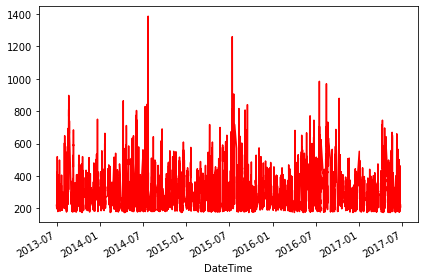

In [ ]:
Data_checkzjer = Data_pakaijer
Data_checkzjer = Data_checkzjer.set_index(pd.to_datetime(Data_checkzjer["DateTime"], errors='coerce', format = "%Y-%m-%d %H:%M:%S"))

Data_checkzjer = Data_checkzjer.drop(['DateTime'], axis=1)

Data_checkzjer.electricity_consumption.plot(color = "red") 
plt.tight_layout()
plt.show()

In [ ]:
Data_prosesjer = Data_pakaijer
Data_dateBenarjer = pd.to_datetime(Data_prosesjer["DateTime"],format = "%Y-%m-%d %H:%M:%S", errors='coerce')
Data_Benarjer = pd.concat([Data_dateBenarjer,Data_prosesjer["electricity_consumption"]], axis=1)

In [ ]:
Data_Benarjer = Data_Benarjer.dropna()
final_dfjer = Data_Benarjer.loc[(Data_Benarjer["electricity_consumption"] > 0.0)]

In [ ]:
format = '%Y-%m-%d %H:%M:%S'
final_dfjer['Datetime'] = pd.to_datetime(final_dfjer['DateTime'], format=format)
final_dfjer = final_dfjer.set_index(pd.DatetimeIndex(final_dfjer['Datetime']))
final_dfjer

,DateTime,electricity_consumption,Datetime
Datetime,,,
2013-07-01 00:00:00,2013-07-01 00:00:00,216.0,2013-07-01 00:00:00
2013-07-01 01:00:00,2013-07-01 01:00:00,210.0,2013-07-01 01:00:00
2013-07-01 02:00:00,2013-07-01 02:00:00,225.0,2013-07-01 02:00:00
2013-07-01 03:00:00,2013-07-01 03:00:00,216.0,2013-07-01 03:00:00
2013-07-01 04:00:00,2013-07-01 04:00:00,222.0,2013-07-01 04:00:00
...,...,...,...
2017-06-23 19:00:00,2017-06-23 19:00:00,225.0,2017-06-23 19:00:00
2017-06-23 20:00:00,2017-06-23 20:00:00,213.0,2017-06-23 20:00:00
2017-06-23 21:00:00,2017-06-23 21:00:00,213.0,2017-06-23 21:00:00


In [ ]:
final_dfjer.drop(['DateTime'], axis=1, inplace=True)
final_dfjer.drop(['Datetime'], axis=1, inplace=True)
final_dfjer

,electricity_consumption
Datetime,
2013-07-01 00:00:00,216.0
2013-07-01 01:00:00,210.0
2013-07-01 02:00:00,225.0
2013-07-01 03:00:00,216.0
2013-07-01 04:00:00,222.0
...,...
2017-06-23 19:00:00,225.0
2017-06-23 20:00:00,213.0
2017-06-23 21:00:00,213.0


In [ ]:
Future_test_w_jer = final_dfjer
Future_test_w_jer

,electricity_consumption
Datetime,
2013-07-01 00:00:00,216.0
2013-07-01 01:00:00,210.0
2013-07-01 02:00:00,225.0
2013-07-01 03:00:00,216.0
2013-07-01 04:00:00,222.0
...,...
2017-06-23 19:00:00,225.0
2017-06-23 20:00:00,213.0
2017-06-23 21:00:00,213.0


In [ ]:
Future_collumn_w_jer = Future_test_w_jer.columns
Future_collumn_w_jer

Index(['electricity_consumption'], dtype='object')

In [ ]:
data_jer = final_dfjer
# Convert the dataframe to a numpy array
dataset_jer = data_jer.values
# Get the number of rows to train the model on
training_data_len_jer = int(np.ceil( len(dataset_jer)))

training_data_len_jer

26496

In [ ]:
array_Future_jer = np.array(Future_test_w_jer)

In [ ]:
Future_test_series_w_jer=series_to_supervised(array_Future_jer,10,1)
Future_test_series_w_jer

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,216.0,210.0,225.0,216.0,222.0,216.0,219.0,222.0,219.0,222.0,201.0
11,210.0,225.0,216.0,222.0,216.0,219.0,222.0,219.0,222.0,201.0,204.0
12,225.0,216.0,222.0,216.0,219.0,222.0,219.0,222.0,201.0,204.0,210.0
13,216.0,222.0,216.0,219.0,222.0,219.0,222.0,201.0,204.0,210.0,216.0
14,222.0,216.0,219.0,222.0,219.0,222.0,201.0,204.0,210.0,216.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...
26491,195.0,216.0,213.0,198.0,210.0,204.0,201.0,201.0,222.0,216.0,225.0
26492,216.0,213.0,198.0,210.0,204.0,201.0,201.0,222.0,216.0,225.0,213.0
26493,213.0,198.0,210.0,204.0,201.0,201.0,222.0,216.0,225.0,213.0,213.0
26494,198.0,210.0,204.0,201.0,201.0,222.0,216.0,225.0,213.0,213.0,210.0


In [ ]:
#all month prediction Normal
def tspredictalljer(Future_test_series_w_jer,data_jer,nc):
   y=pd.DataFrame( data_jer.loc[:])
   X=data_jer.iloc[:,:(len(Future_test_series_w_jer))]
   c=centers(X,nc)
   r=radial(X,c)
   inputs= pd.DataFrame(RBF(c,r,X))
   inputs__arr=np.array(inputs)
   y__arr=np.array(y)
   prediction=[]
   
   # create model
   model = Sequential()
   model.add(Dense(1, input_dim=nc, kernel_initializer='normal'))
   # Compile model
   opt = tf.keras.optimizers.SGD(learning_rate=0.01)
   model.compile(loss='mean_squared_error', optimizer=opt)

   for i in range(len(Future_test_series_w_jer)):
        model.fit(inputs__arr,y__arr[:,i], epochs=350, batch_size=5,verbose=0)
        pred=model.predict(inputs__arr)
        pred=(np.squeeze(pred))
        prediction.append(pred)
   return (prediction)

predall_jer=tspredictalljer(Future_collumn_w_jer,Future_test_series_w_jer,80)

In [ ]:
predall_jer = np.array(predall_jer)
predall_jer

array([[215.81723, 209.50464, 225.26256, ..., 212.65524, 197.31204,
        209.50464]], dtype=float32)

In [ ]:
final_dfjer_w_pre = Future_test_w_jer
final_dfjer_w_pre = final_dfjer_w_pre.reset_index()
final_dfjer_w_pre

,Datetime,electricity_consumption
0,2013-07-01 00:00:00,216.0
1,2013-07-01 01:00:00,210.0
2,2013-07-01 02:00:00,225.0
3,2013-07-01 03:00:00,216.0
4,2013-07-01 04:00:00,222.0
...,...,...
26491,2017-06-23 19:00:00,225.0
26492,2017-06-23 20:00:00,213.0
26493,2017-06-23 21:00:00,213.0
26494,2017-06-23 22:00:00,210.0


In [ ]:
def predict_dates_w_jer(num_prediction_w_jer):
    last_date_w_jer = final_dfjer_w_pre['Datetime'].values[-1]
    prediction_dates_w_jer = pd.date_range(last_date_w_jer, periods=num_prediction_w_jer,freq = "h").tolist()
    return prediction_dates_w_jer

forecast_dates_w_jer = predict_dates_w_jer(predall_jer.size)
forecast_dates_w_jer

[Timestamp('2017-06-23 23:00:00', freq='H'),
 Timestamp('2017-06-24 00:00:00', freq='H'),
 Timestamp('2017-06-24 01:00:00', freq='H'),
 Timestamp('2017-06-24 02:00:00', freq='H'),
 Timestamp('2017-06-24 03:00:00', freq='H'),
 Timestamp('2017-06-24 04:00:00', freq='H'),
 Timestamp('2017-06-24 05:00:00', freq='H'),
 Timestamp('2017-06-24 06:00:00', freq='H'),
 Timestamp('2017-06-24 07:00:00', freq='H'),
 Timestamp('2017-06-24 08:00:00', freq='H'),
 Timestamp('2017-06-24 09:00:00', freq='H'),
 Timestamp('2017-06-24 10:00:00', freq='H'),
 Timestamp('2017-06-24 11:00:00', freq='H'),
 Timestamp('2017-06-24 12:00:00', freq='H'),
 Timestamp('2017-06-24 13:00:00', freq='H'),
 Timestamp('2017-06-24 14:00:00', freq='H'),
 Timestamp('2017-06-24 15:00:00', freq='H'),
 Timestamp('2017-06-24 16:00:00', freq='H'),
 Timestamp('2017-06-24 17:00:00', freq='H'),
 Timestamp('2017-06-24 18:00:00', freq='H'),
 Timestamp('2017-06-24 19:00:00', freq='H'),
 Timestamp('2017-06-24 20:00:00', freq='H'),
 Timestamp

In [ ]:
Future_data_w_jer = pd.DataFrame({"Datetime":forecast_dates_w_jer,"electricity_consumption":predall_jer.reshape(1,-1)[0]})
Future_data_w_jer

,Datetime,electricity_consumption
0,2017-06-23 23:00:00,215.817230
1,2017-06-24 00:00:00,209.504639
2,2017-06-24 01:00:00,225.262558
3,2017-06-24 02:00:00,215.817230
4,2017-06-24 03:00:00,222.129761
...,...,...
26481,2020-07-01 08:00:00,194.454132
26482,2020-07-01 09:00:00,215.817230
26483,2020-07-01 10:00:00,212.655243
26484,2020-07-01 11:00:00,197.312042


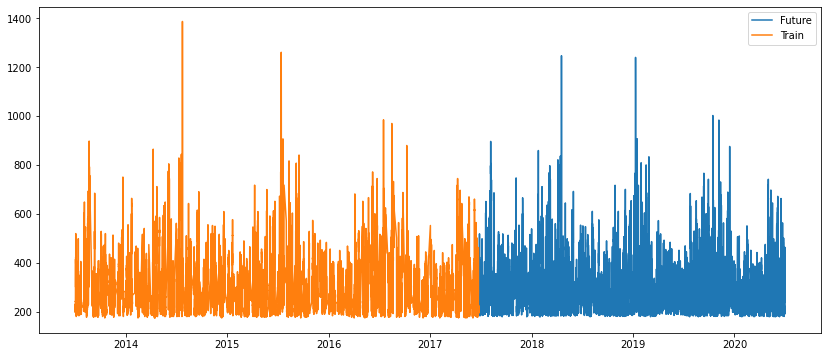

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Future_data_w_jer["Datetime"],Future_data_w_jer["electricity_consumption"], label="Future")
plt.plot(final_dfjer_w_pre["Datetime"],final_dfjer_w_pre["electricity_consumption"], label = "Train")
plt.legend()
plt.show()

In [ ]:
Data_With_Future_w_jer = final_dfjer_w_pre.append(Future_data_w_jer)
Data_With_Future_w_jer

,Datetime,electricity_consumption
0,2013-07-01 00:00:00,216.000000
1,2013-07-01 01:00:00,210.000000
2,2013-07-01 02:00:00,225.000000
3,2013-07-01 03:00:00,216.000000
4,2013-07-01 04:00:00,222.000000
...,...,...
26481,2020-07-01 08:00:00,194.454132
26482,2020-07-01 09:00:00,215.817230
26483,2020-07-01 10:00:00,212.655243
26484,2020-07-01 11:00:00,197.312042


In [ ]:
Data_With_Future_w_jer.set_index("Datetime",inplace=True)

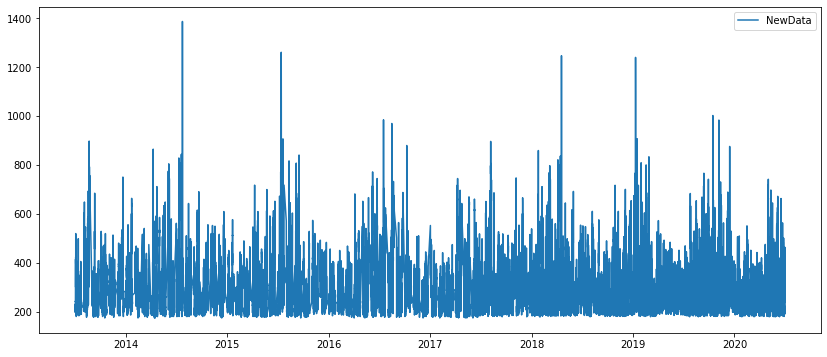

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Data_With_Future_w_jer, label = "NewData")
plt.legend()
plt.show()

In [ ]:
Data_Bulanan_w_jer = Data_With_Future_w_jer.resample('m').sum() 
Data_Bulanan_w_jer

,electricity_consumption
Datetime,
2013-07-31,132600.000000
2013-08-31,213423.000000
2013-09-30,148800.000000
2013-10-31,162543.000000
2013-11-30,146460.000000
...,...
2020-03-31,183659.890518
2020-04-30,203217.613403
2020-05-31,232348.049606
